## Classification and Regression with K-Nearest Neighbors

## Neighbors are representations of training instances in a 'Metric Space'. A 'Metric Space' is a feature space in which all of the distances in a set are defined. The neighbors are used to estimate the value of the response variable for a test instance. The hyperparameter 'k' specifies how many neighbors can be used in the estimation. A 'HYPERPARAMETER' is a parameter that controls how the 'ALGORITHM' learns. Also 'HYPERPARAMETERS' are not estimated from the 'TRAINING DATA' and are sometimes set manually. The 'k' neighbors that are selected are those that are nearest to the test instance, measured by some 'DISTANCE FUNCTION'.

## https://towardsdatascience.com/how-to-measure-distances-in-machine-learning-13a396aa34ce

## Lazy Learning and Non-Parametric Models

## KNN is a 'LAZY LEARNER' also known as a 'INSTANCE BASED LEARNER' meaning it stores the dataset and does very little to no processing which is in contrast to SIMPLE LINEAR REGRESSION' which is an 'EAGER LEARNER'. KNN does not estimate the parameters of a model that generalizes the 'TRAINING DATA' during the 'TRAINING PHASE'.

## DIFFERENCES OF LAZY AND EAGER LEARNERS

## Training an 'EAGER LEARNER' is computationally expensive but predictions with the resulting model are cheap. In 'SIMPLE LINEAR REGRESSION', prediction consists of multiplying the learned coefficient by the feature and adding the learned intercept parameter. 

## See notebook on Simple Linear Regression

## A 'LAZY LEARNER' can predict almost immediately but making those predictions can be expensive. For 'KNN' prediction requires calculating the distances between a 'TEST INSTANCE' and ALL OF THE TRAINING INSTANCES. 

## KNN is a 'NON-PARAMETRIC MODEL' meaning that it can take 'UNFIXED NUMBER OF PARAMETERS/COEFFICIENTS' which is in contrast to a 'PARAMETRIC MODEL' that takes a 'FIXED NUMBER OF PARAMETERS/COEFFICIENTS'

## 'NON-PARAMETRIC MODELS' are useful when there is an abundance of 'TRAINING DATA' and I have little to no prior knowledge of the 'RESPONSE and EXPLANATORY VARIABLES'. KNN assumes instances near each other have similar values of the 'RESPONSE VARIABLE'. This can be advantageous if the 'TRAINING DATA' is scarce or if I have prior knowledge of the data. 

## https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/?unapproved=518785&moderation-hash=fd4cbfac8834ca5704a5f777a316ac47#comment-518785



## Classification with KNN

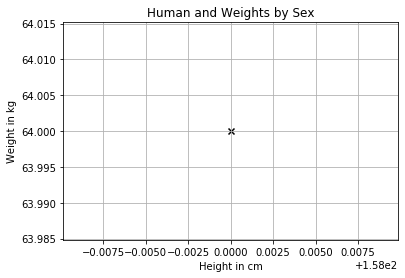

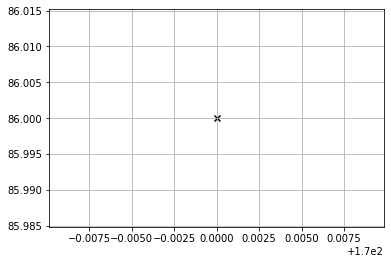

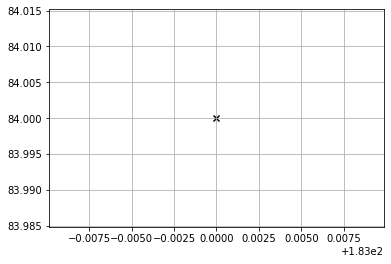

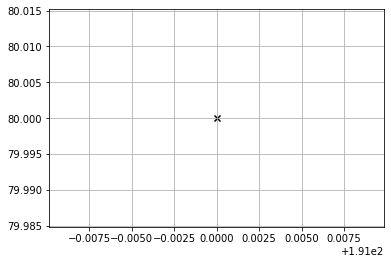

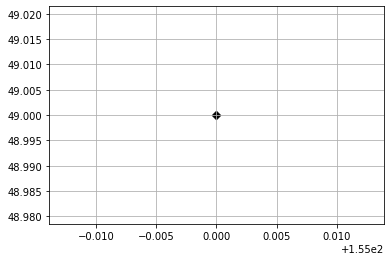

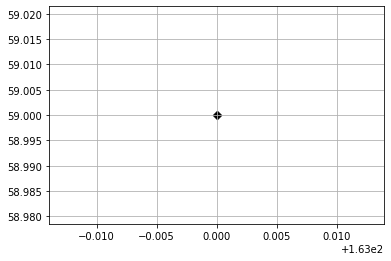

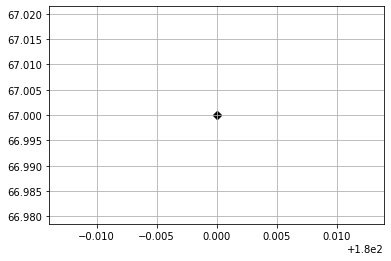

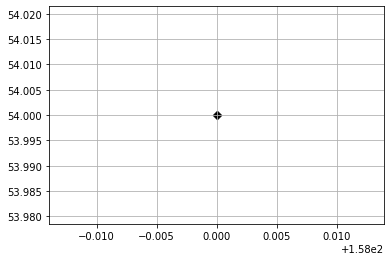

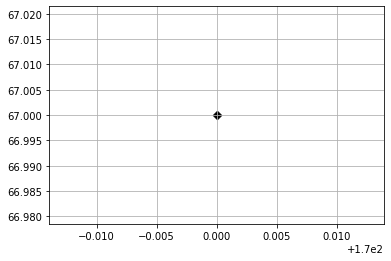

In [3]:
# Classification with KNN

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.array([[158, 64],
                   [170, 86],
                   [183, 84],
                   [191, 80],
                   [155, 49],
                   [163, 59],
                   [180, 67],
                   [158, 54],
                   [170, 67]])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train): # enumerate adds a counter to an iterable
    # Use 'x' markers for instances that are 'male' and 'diamond' markers for 'female'
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
    plt.grid(True)
    plt.show()
# This should have been in one graph but I will figure out later. It shows each point in a separate graph.
    

## I see that men are obviously taller and weigh more than women. I will use KNN to predict whether a person with a given height and weight is a male or female. I will use 'EUCLIDEAN DISTANCE' which is the straight line distance between points in a 'EUCLIDEAN SPACE'. 

## The formula is as follows

## d(p,q) = d(q,p) = sqrt((q1 - p1)**2 + (q2 - p2)**2)

## https://towardsdatascience.com/how-to-measure-distances-in-machine-learning-13a396aa34ce

In [6]:
# I am going to predict the sex of a person who is 155 cm tall and weighs 70kg
# Using the 'Euclidean Distance' formula above, I have to subtract 155 cm from all of the heights and
# square them, plus (+) subtract 70 kg from all of the weights and square them and 
# finally find the square root of that sum.

# I will set 'k' to 3 and select the 3 training instances.

x = np.array([[155, 70]])
eu_distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
eu_distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [8]:
nearest_neighbor_indices = eu_distances.argsort() [:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

# https://railsware.com/blog/python-for-machine-learning-pandas-axis-explained/
# https://www.geeksforgeeks.org/numpy-take-python/
# https://www.geeksforgeeks.org/numpy-argsort-in-python/

array(['male', 'female', 'female'], dtype='<U6')

In [10]:
from collections import Counter
b = Counter(np.take(y_train, eu_distances.argsort() [:3]))
b.most_common(1)[0][0]

# https://kite.com/python/docs/collections.Counter.most_common

'female'

In [11]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [12]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1)) [0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

## The labels are 'STRINGS' so I used the 'LabelBinarizer' which converts 'STRINGS' to 'INTEGERS'.

## 'LabelBinarizer' implements the 'Transformer' interface containing the 'fit', 'transform' and 'fit_transform' methods. 

## The 'fit' method prepares the 'transformer', creating a mapping from label strings to integers.

## The 'transform' method applies the mapping to input labels.

## The 'fit_transform' does both in one step.

## A 'transformer' should only apply to the 'TRAINING SET' and SHOULD NOT BE FIT ON THE ENTIRE DATASET because some transformers have the potential to leak data. 

## I implement the 'KNeighborsClassifier' which is a 'LAZY LEARNER' but still implements the 'ESTIMATOR' interface. I will call the 'fit' and 'predict' methods like in 'Simple Linear Regression'. 

## I then use the LabelBinarizer to reverse the transformation and return a 'STRING' 

### https://www.programcreek.com/python/example/85925/sklearn.preprocessing.LabelBinarizer
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
### https://stackoverflow.com/questions/50473381/scikit-learns-labelbinarizer-vs-onehotencoder

In [13]:
# Use the classifier to make predictions for a TEST set

import numpy as np
X_test = np.array([[168, 65],
                  [180, 96],
                  [160, 52],
                  [169, 67],
                  ])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized Labels: %s' %y_test_binarized.T[0]) # pandas.DataFrame.T - transposes indexes and columns
predictions_binarized = clf.predict(X_test)
print('Binarized Predictions: %s' %predictions_binarized)
print('Predicted Labels: %s' %lb.inverse_transform(predictions_binarized))



Binarized Labels: [1 1 0 0]
Binarized Predictions: [0 1 0 0]
Predicted Labels: ['female' 'male' 'female' 'female']


### By comparing our test labels to our classifier's predictions, we find that it incorrectly predicted that one of the 'male' test instances was 'female'. There are two types of errors in binary classification tasks (FALSE POSITIVES and FALSE NEGATIVES) There are many performance measures for classifiers; some measures may be more appropriate than others depending on the consequences of the types of errors in your application. We will assess our classifier using several common performance measures, including ACCURACY, PRECISION and RECALL. 

### ACCURACY is the proportion of test instances that were classified correctly. Our model classified one of the four instances incorrectly, so the accuracy is 75%.

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


### PRECISION is the proportion of test instances that were predicted to be positive that are TRULY POSITIVE. In this example, the positive class is 'male'. The assignment of 'male and 'female' to the positive and negative classes is arbitrary, and could be reversed. Our classifier predicted that one of the test instances is the positive class. This instance is truly the positive class, so the classifier's precision is 100%:

In [15]:
from sklearn.metrics import precision_score
print('Precision : %s' % precision_score(y_test_binarized, predictions_binarized))

Precision : 1.0


### RECALL is the proportion of truly positive test instances that were predicted to be positive. Our classifier predicted that one of the two truly positive test instances is positive. Its recall is therefore 50%.

In [16]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


### Sometimes it is useful to summarize precision and recall with a single statistic, called the F1 SCORE or F1 MEASURE. The F1 SCORE is the HARMONIC MEAN of PRECISION and RECALL.

In [17]:
from sklearn.metrics import f1_score
print('F1_Score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1_Score: 0.6666666666666666


### The arithmetic mean of the precision and recall scores is the upper bound of the F1 score. The F1 score penalizes classifiers more as the difference between their precision and recall scores increases. Finally, the MATTHEWS CORRELATION COEFFICENT (MCC) is an alternative to the F1 score for measuring the performance of binary classifiers. A perfect classifier's MCC is 1. A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1. MCC is useful even when the proportions of the classes in the test set is severely imbalanced:

In [18]:
from sklearn.metrics import matthews_corrcoef
print('MCC - Matthews Correlation Coefficient: %s' % 
      matthews_corrcoef(y_test_binarized,predictions_binarized))

MCC - Matthews Correlation Coefficient: 0.5773502691896258


### Finally sklearn has a singel method called 'classification_report' that outputs the PRECISION, RECALL and F1

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized,
                            target_names = ['male'], labels = [1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



## Regression with KNN

### I will use a person's height to predict their sex

### I will instantiate and fit 'KNeighborsRegressor' and use it to predict weights. In this dataset, sex has already been coded as a binary-valued feature. Notice that this feature ranges from 0 to 1, while the values of the feature representing the person's height range from 155 to 191. We will discuss why this is a problem, and how it can be ameliorated, in the next section. In the pizza price problem, we used the coefficient of determination to measure the performance of our model. We will use it to measure the performance of our regressor again, and introduce two more performance measures for regression tasks--Mean Absolute Error (MAE) and Mean Squared Error (MSE):

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
X_train = np.array([[158, 1],
                  [170, 1],
                  [183, 1],
                  [191, 1],
                  [155, 0],
                  [163, 0],
                  [180, 0],
                  [158, 0],
                  [170, 0]])
y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([[168, 1],
                   [180, 1],
                   [160, 0],
                   [170, 0]])
y_test = [65, 96, 52, 67]

K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Predicted Weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test, predictions))
print('Mean squared error: %s' % mean_squared_error(y_test, predictions))

Predicted Weights: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889


### MEAN ABSOLUTE ERROR - the average of the absolute values of the errors of the predictions.

## MAE = 1/n sum(n-1, i = 0)|yi - ^yi|

### MEAN SQUARED ERROR/DEVIATION - the average of the squares of the errors of the predictions 

## MSE/D = 1/n sum(n-1, i = 0)(yi - ^yi) **2

### MSE penalizes outliers more than MAE; squaring a large error makes it contribute disproportionately more to the total error. This may be desirable in some problems, but MSE is often preferred even when it is not, as MSE has useful mathematical properties. Note that ordinary linear regression, such as the previous chapter's simple linear regression problem, minimizes the square root of the MSE.

## Scaling Features

### Many learning algorithms work better when features take similar ranges of values. In the previous section, we used two features: a binary-valued feature representing the person's sex and a continuous-valued feature representing the person's height in centimeters. Consider a dataset in which we have a man who is 170 cm tall and a woman who is 160 cm tall.

### Which instance is closer to a man who is 164 cm tall? For our weight prediction problem, we probably believe that the query is closer to the male instance; a 6 cm difference in height is less important to predicting weight than the difference between sexes. If we represent the height in millimeters, the query instance is closer to the 1600 mm tall female. If we represent the height in meters, the query instance is closer to the 1.7 meter tall male. If we represent the heights in micrometers, the height feature would dominate the distance function even more. 

In [31]:
# Scaling features - scipy.spatial.distance library

from scipy.spatial.distance import euclidean

# heights in millimeters
X_train = np.array([[1700, 1],
                   [1600, 0]])
X_test = np.array([1640, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], X_test))
print(euclidean(X_train[1, :], X_test))

60.0
40.01249804748511


In [32]:
# heights in meters
X_train = np.array([[1.7, 1],
                   [1.6, 0]])
X_test = np.array([164, 1]).reshape(1, -1)
print(euclidean(X_train[0, :], X_test))
print(euclidean(X_train[1, :], X_test))


162.3
162.40307878855006


### 'StandardScaler' is a transformer that scales features so that they have unit variance. It first centers features by subtracting the mean of each feature from each instance's value of the feature. It then scales the features by dividing each instance's value of the feature by the standard deviation of the feature. Data that has zero mean and unit variance is standardized. Like 'LabelBinarizer', 'StandardScaler' implements the transformer interface. I will standardize the previous problem's features, fit the regressor again, and compare the performances of the two models.

In [34]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

print('X_Train: %s' % X_train)
print('X_Train_SCALED: %s' % X_train_scaled)

X_Train: [[1.7 1. ]
 [1.6 0. ]]
X_Train_SCALED: [[ 1.  1.]
 [-1. -1.]]


In [ ]:
X_test_scaled = ss.transform(X_test)

ss.fit(X_train_scaled, y_train)
predictions = clf.predict(X_test_scaled)
print('Predicted weights: %s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test, predictions))


## The last part code below that does not work, will t-shoot at a later date.

## Summary
### In this chapter, we introduced KNN, a simple but powerful model that can be used in classification and regression tasks. KNN is a lazy learner and a non-parametric model; it does not estimate the values of a fixed number of parameters from the training data. Instead, it stores all the training instances and uses the instances that are nearest the test instance to predict the value of the response variable. We worked through toy classification and regression problems. We also introduced scikit-learn's transformer interface; we used 'LabelBinarizer'to transform string labels to binary labels and 'StandardScaler' to standardize our features.

### In the next chapter, we will discuss feature extraction techniques for categorical variables, text, and images; these will allow us to apply KNN to more problems in the real world.